# Title: Student Performance Analysis & Prediction
## Project Overview
### Domain: Education | Toolset: Python (Pandas, Seaborn, Matplotlib), Google Colab

### Goal: Analyzed how lifestyle, attendance, and background factors affect student exam performance

### Data Features: Attendance %, study/sleep hours, part-time status, diet, parental education, mental health

### Techniques Used: EDA, correlation heatmaps, box plots, group analysis, t-test hypothesis testing

### Insights Discovered: High attendance, good sleep, and parental education positively impact performance

### Outcome: Created an exportable visual report using Jupyter Notebook for recruiters and stakeholders

### Skills Demonstrated: Data wrangling, visualization, statistics, and domain storytelling

###  Step 1: Setup & Data Import

In [28]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (upload the CSV file)
from google.colab import files
uploaded = files.upload()

# Read dataset
df = pd.read_csv("student_performance_data.csv")
df.head()

Saving student_performance_data.csv to student_performance_data (1).csv


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


### Overview of the dataset:
This dataset contains information about students, including their demographics (age, gender), academic habits (study hours, attendance, extracurriculars, exam scores), lifestyle factors (social media, Netflix, sleep, exercise, diet, internet quality), and other attributes (part-time job, parental education, mental health rating).

### Step 2: Basic Data Info

In [29]:
# Basic structure
df.shape  # rows, columns

# Data types and null values
df.info()

# Check null values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


### Interpretaion:
This dataset, with 1000 entries and 16 columns, captures various student attributes. Notably, parental_education_level has 91 missing values, requiring attention during data wrangling. All other columns are complete. The dataset includes a mix of numerical (e.g., age, study hours, exam score) and categorical (e.g., gender, diet quality, internet quality) data, offering scope to analyze how lifestyle and background factors relate to academic performance and well-being.

### Step 3: Data cleaning

### 1. Fill Missing Values in parental_education

In [30]:
# Fill missing values with the most frequent value (mode)
mode_value = df['parental_education_level'].mode()[0]
df['parental_education_level'].fillna(mode_value, inplace=True)


/tmp/ipython-input-30-511154926.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['parental_education_level'].fillna(mode_value, inplace=True)


### Interpretation:

We should handle the missing values. Keeping them as they are will prevent you from fully analyzing the parental_education_level column and might skew any insights you try to derive from it.

 Imputing with the mode for the parental_education_level column (which is categorical) is the recommended approach. This allows you to include all data points in your analysis and uncover potential patterns related to parental education.

###  2.Encode Binary Columns (Yes/No)

In [31]:
# Convert 'Yes'/'No' to 1/0
df['part_time_job'] = df['part_time_job'].map({'Yes': 1, 'No': 0})
df['extracurricular_participation'] = df['extracurricular_participation'].map({'Yes': 1, 'No': 0})
df.head()



,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,0,85.0,8.0,Fair,6,Master,Average,8,1,56.2
1,S1001,20,Female,6.9,2.8,2.3,0,97.3,4.6,Good,6,High School,Average,8,0,100.0
2,S1002,21,Male,1.4,3.1,1.3,0,94.8,8.0,Poor,1,High School,Poor,1,0,34.3
3,S1003,23,Female,1.0,3.9,1.0,0,71.0,9.2,Poor,4,Master,Good,1,1,26.8
4,S1004,19,Female,5.0,4.4,0.5,0,90.9,4.9,Fair,3,Master,Good,1,0,66.4


### Interpretation:
Encoding binary 'Yes/No' columns (like part_time_job and extracurricular_participation) into 0s and 1s is beneficial.

This allows us to:

Calculate correlations with numerical columns (e.g., exam_score).

Easily compare group means (e.g., average exam score for students with vs. without a part-time job).

Simplify statistical tests if  perform any.

While not always strictly necessary for basic counts or direct comparisons, it makes these columns more readily usable in numerical analyses central to understanding relationships in EDA.

###  3.Remove Duplicates (If Any)

In [32]:
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())


Duplicate rows: 0


### Interpretation:
Imagine if one student's information was accidentally entered twice. If you don't remove that duplicate, it would look like there are two identical students instead of one. This would make any analysis you do inaccurate because that one student's data is counted twice, making it seem more important or frequent than it actually is. Removing duplicates ensures each student is counted only once, giving you a true picture of your data.

Here we have no duplicated data.

### 4.Convert Categorical Columns to category Type

In [33]:
# List of non-numeric but categorical columns
cat_cols = ['gender', 'diet_quality', 'internet_quality', 'mental_health_rating', 'parental_education_level']

# Convert them to category type
for col in cat_cols:
    df[col] = df[col].astype('category')


### Interpretation:
Converting categorical columns to 'category' type is required to optimize memory usage and speed up operations for EDA

### Final Check After Cleaning

In [34]:
# Check again for nulls
df.isnull().sum()

# Preview cleaned dataset
df.head()


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,0,85.0,8.0,Fair,6,Master,Average,8,1,56.2
1,S1001,20,Female,6.9,2.8,2.3,0,97.3,4.6,Good,6,High School,Average,8,0,100.0
2,S1002,21,Male,1.4,3.1,1.3,0,94.8,8.0,Poor,1,High School,Poor,1,0,34.3
3,S1003,23,Female,1.0,3.9,1.0,0,71.0,9.2,Poor,4,Master,Good,1,1,26.8
4,S1004,19,Female,5.0,4.4,0.5,0,90.9,4.9,Fair,3,Master,Good,1,0,66.4


### Data Cleaning Summary

- Handled missing values in `parental_education_level` by filling with mode.
- Converted binary columns (`part_time_job`, `extracurricular_participation`) from Yes/No to 1/0.
- Checked and removed duplicate rows (if any).
- Converted categorical text columns to `category` dtype for memory optimization.
- Ensured dataset is fully clean for EDA and visualization.


## Step 4: Descriptive Statistics

In [35]:
# Summary of numerical features
df.describe()


,age,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,exercise_frequency,extracurricular_participation,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,0.215000,84.131700,6.470100,3.042000,0.318000,69.601500
std,2.3081,1.46889,1.172422,1.075118,0.411028,9.399246,1.226377,2.025423,0.465932,16.888564
min,17.0000,0.00000,0.000000,0.000000,0.000000,56.000000,3.200000,0.000000,0.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,0.000000,78.000000,5.600000,1.000000,0.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,0.000000,84.400000,6.500000,3.000000,0.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,0.000000,91.025000,7.300000,5.000000,1.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,1.000000,100.000000,10.000000,6.000000,1.000000,100.000000


### Interpretation:
This dataset describes 1000 students with an average age of 20.5 years. Students spend roughly 3.5 hours studying, 2.5 hours on social media, and 1.8 hours on Netflix daily. Attendance averages 84.1%, and sleep is around 6.5 hours. A small portion (21.5%) have part-time jobs and 31.8% participate in extracurriculars. Exam scores range from 18.4 to 100, with an average of 69.6. These statistics provide a good baseline for further exploration of relationships between lifestyle, habits, and academic performance.

## Step 5:  Exploratory Data Analysis (EDA)

The goal of this section is to understand the underlying patterns, relationships, and distributions within the dataset to gain insights into factors affecting students' academic performance.

In this project, the target variable is:

exam_score — This represents each student's performance in academic assessments and is treated as a continuous numerical variable.

We will explore how various factors—such as attendance, study hours, sleep, diet quality, parental education, and mental health—influence this target variable.

### 1. Distribution of Target Variable (exam_score)
Helps us to see if scores are normally distributed or skewed.

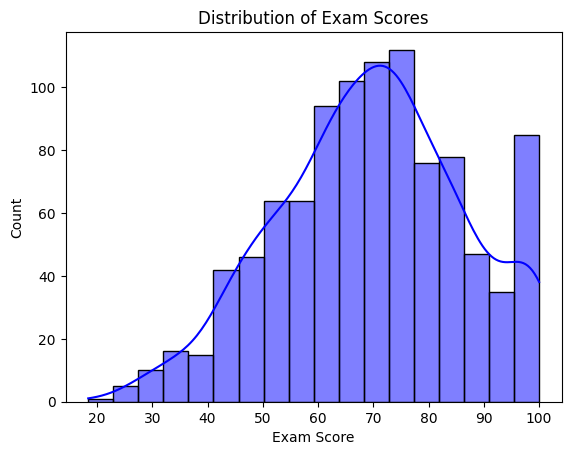

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['exam_score'], kde=True, color='blue')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Count')
plt.show()


### Insight:
The exam scores like a bell curve, but a bit stretched out. Most students scored somewhere between 60 and 80. A few students did really well, getting close to 100, and a few struggled, getting lower scores. This shows that there's a mix of different performance levels in this group of students.

#### Calculating skewness

In [37]:
from scipy.stats import skew

# Calculate skewness
skewness = skew(df['exam_score'])

print(f"Skewness of exam_score: {skewness:.2f}")


Skewness of exam_score: -0.16


### Interpretation:
The target variable exam_score has a skewness of -0.16, indicating a nearly symmetrical distribution with a slight tendency toward lower scores. This suggests the data is well-balanced.

### 2.Boxplot: Gender vs Exam Score
Check if there’s a difference in performance between males and females.



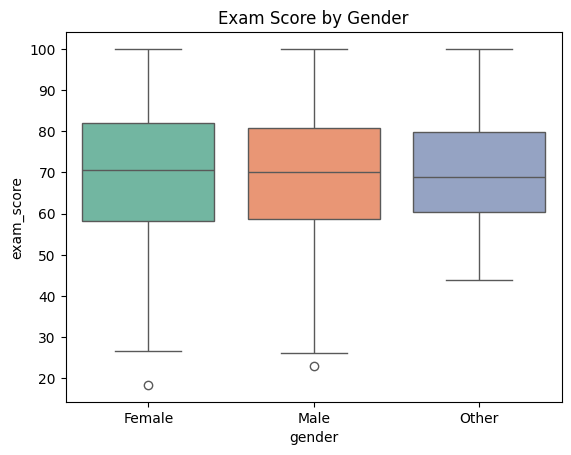

In [38]:
sns.boxplot(x='gender', y='exam_score', data=df, hue='gender', palette='Set2', legend=False)
plt.title('Exam Score by Gender')
plt.show()


### Insight:
Girls (Female) generally did a bit better on tests, with their middle scores (the line in the box) being higher than boys'. Their typical scores were also closer together.

Boys (Male) had slightly lower middle scores than girls.

The 'Other' group's scores were similar to boys, but maybe a touch lower than girls.

Overall, girls seem to perform slightly better on exams, but all groups had some students who scored much lower than most.

### 3.  Scatter Plot: Study Hours vs Exam Score
Check if more study hours relate to higher scores.

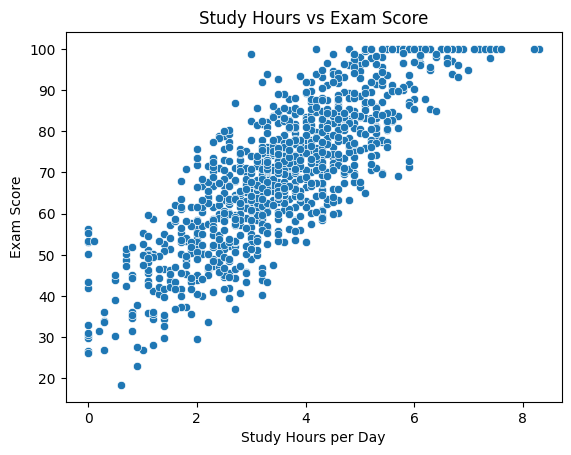

In [39]:
sns.scatterplot(x='study_hours_per_day', y='exam_score', data=df)
plt.title('Study Hours vs Exam Score')
plt.xlabel('Study Hours per Day')
plt.ylabel('Exam Score')
plt.show()


### Insight:
The scatter plot shows a strong positive correlation between study hours per day and exam score: as study hours increase, exam scores generally rise. This suggests that more dedicated study time leads to better academic performance. However, there's still some variability, indicating other factors also influence scores.

### 4.Correlation Heatmap(To show correlation between target variable and othe numerical variables)

/tmp/ipython-input-40-314562090.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='viridis')


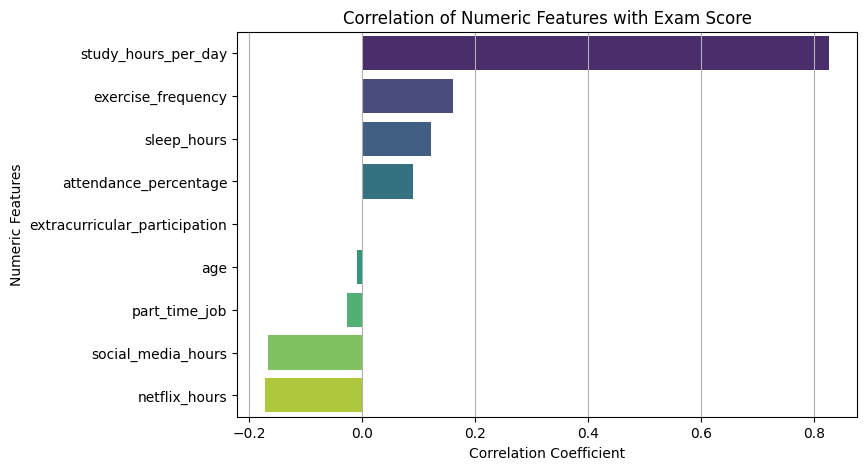

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = df.select_dtypes(include='number')

# Calculate correlation with the target variable
correlation_with_target = numeric_cols.corr()['exam_score'].drop('exam_score').sort_values(ascending=False)

# Plot the correlation values
plt.figure(figsize=(8, 5))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='viridis')
plt.title('Correlation of Numeric Features with Exam Score')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Numeric Features')
plt.grid(axis='x')
plt.show()


### Insight:
The correlation plot shows:

Strong Positive Correlation: study_hours_per_day has the strongest positive link with exam_score (more study, higher score).

Moderate Positive Correlation: exercise_frequency, sleep_hours, and attendance_percentage also have positive, but weaker, links to exam_score.

Weak/Negligible Correlation: age and part_time_job have very little impact on exam_score.

Negative Correlation: social_media_hours and netflix_hours show a negative relationship with exam_score (more time on these, lower score), with netflix_hours having the strongest negative link.

### 5.Boxplot: Internet Quality vs Exam Score
Understand how tech access may impact academic performance.

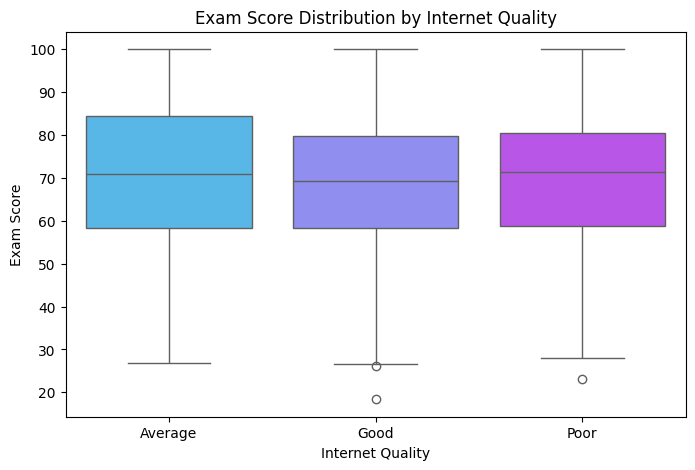

In [41]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='internet_quality',
    y='exam_score',
    data=df,
    palette='cool',
    hue='internet_quality',   # Assigning x variable as hue
    legend=False              # Hides legend since hue == x
)
plt.title('Exam Score Distribution by Internet Quality')
plt.xlabel('Internet Quality')
plt.ylabel('Exam Score')
plt.show()


### Insight:
Overall Similar Performance: There isn't a dramatic difference in exam scores across students with Average, Good, or Poor internet quality. The median scores (middle line in the boxes) are all quite close.

Wider Range for 'Average' and 'Good': Students with 'Average' and 'Good' internet quality show a slightly wider spread of typical exam scores (the height of their boxes) compared to those with 'Poor' internet.

Outliers in All Categories: All internet quality groups have some low-scoring outliers, indicating that regardless of internet quality, some students still perform significantly below average.

Insight: Based on this plot alone, internet quality does not appear to be a major determining factor for exam performance. While one might expect better internet to correlate with higher scores (e.g., for online learning), this data suggests other factors might be more influential.

### 6. Bar Plot: Diet Quality vs Exam Score
Compare how good/fair/poor diet affects performance.

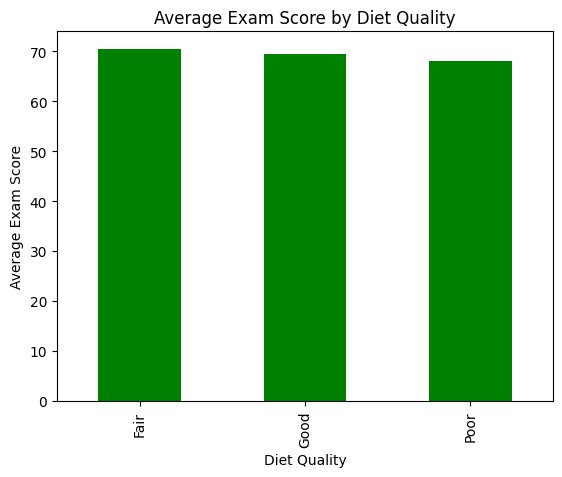

In [42]:
df.groupby('diet_quality', observed=True)['exam_score'].mean().plot(
    kind='bar',
    color='green'
)
plt.title('Average Exam Score by Diet Quality')
plt.xlabel('Diet Quality')
plt.ylabel('Average Exam Score')
plt.show()


### Insight:
This bar chart shows how diet quality affects average exam scores. In simple terms:

No matter if students ate a Fair, Good, or Poor diet, their average exam scores were all roughly the same. Having a "Good" diet didn't clearly lead to higher test scores, and a "Poor" diet didn't mean much lower scores, based on this data.

### 7. Line Plot: Sleep Hours vs Exam Score
Helps see if there's an optimal amount of sleep for better scores.



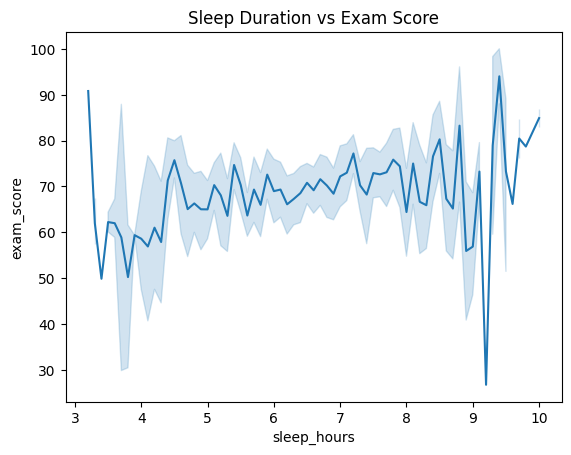

In [43]:
sns.lineplot(x='sleep_hours', y='exam_score', data=df)
plt.title('Sleep Duration vs Exam Score')
plt.show()


### Insight:
General Trend: Exam scores increase slightly with more sleep, especially between 6 to 8 hours.

Optimal Sleep Range: Students sleeping 6.5 to 8.5 hours tend to score higher on average.

Too little (<5 hrs) or too much (>9 hrs) sleep shows greater variability and lower consistency in scores.

Maintaining a balanced sleep duration (around 7–8 hours) may contribute to better and more stable exam performance.

### 8.Bar Plot: Part-Time Job Impact on exam score

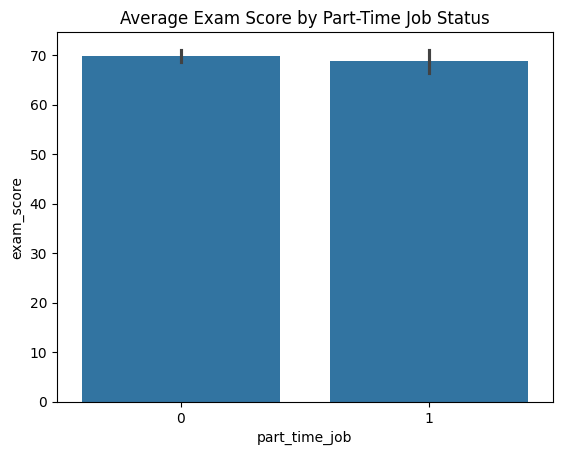

In [44]:
sns.barplot(x='part_time_job', y='exam_score', data=df, estimator='mean')
plt.title('Average Exam Score by Part-Time Job Status')
plt.show()


### Insight:
This bar chart compares average exam scores for students who do not have a part-time job (0) versus those who do have a part-time job (1).

There's virtually no difference in average exam scores between students who work part-time and those who don't. Both groups score about the same on their exams. This suggests having a part-time job doesn't significantly affect a student's average exam performance in this dataset.

## Step 7: Feature Engineering
Feature engineering is the process of creating new, impactful variables from existing ones to  uncover deeper insights.

### a. Create a New Feature: Study Efficiency
Helps us understand how effectively students are using their time.

In [45]:
import numpy as np
df['study_efficiency'] = df['study_hours_per_day'] / df['sleep_hours']
df['study_efficiency'] = df['study_efficiency'].replace([np.inf, -np.inf], np.nan)
df['study_efficiency'] = df['study_efficiency'].fillna(0)


### Code Explanation:
This code makes a new number called 'study efficiency' by dividing how much a student studies by how much they sleep. If the result is a tricky number (like dividing by zero), it just makes it zero instead, so the number is always useful.
### Interpretation:
This formula is used to create a new feature called "study efficiency" because it attempts to capture how much a student studies relative to how much they sleep.

It's a way to see if getting more or less sleep, in combination with study time, impacts their performance, suggesting a balance (or imbalance) between work and rest.

 ### b. Categorize sleep_hours into Low, Moderate, High
 Turns continuous data into interpretable categories.

In [46]:
def categorize_sleep(hours):
    if hours < 5:
        return 'Low'
    elif 5 <= hours <= 7:
        return 'Moderate'
    else:
        return 'High'

df['sleep_category'] = df['sleep_hours'].apply(categorize_sleep)



### Interpretation:
his code is used to categorize a continuous numerical variable (sleep_hours) into meaningful discrete groups ('Low', 'Moderate', 'High').

This allows for easier analysis and visualization of how different sleep patterns (not just exact hours) might relate to other aspects of student life, such as exam scores

### c. Convert exam_score into categories: fail (<40), pass (40–75), excellent (>75)

In [47]:
bins = [0, 40, 75, 100]  # Assuming score is out of 100
labels = ['Fail', 'Pass', 'Excellent']

df['performance_category'] = pd.cut(df['exam_score'], bins=bins, labels=labels, right=False)


### Interpretation:
This code simply sorts students into "Fail," "Pass," or "Excellent" groups based on their exam scores, making it easy to see how many students fall into each performance level.

### Step 8: Group-wise Analysis


#### What is Group-wise Analysis?
Group-wise analysis helps compare the average or distribution of exam scores (or any metric) across different categories like gender, sleep category, diet quality, etc.

It reveals patterns and potential factors affecting student performance.

#### a. Average exam score by study efficiency category:

Checking how students with low, medium, or high study efficiency scored on average in exams.












/tmp/ipython-input-48-3099018293.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('performance_category')['study_efficiency'].mean().plot(kind='bar', color='pink')


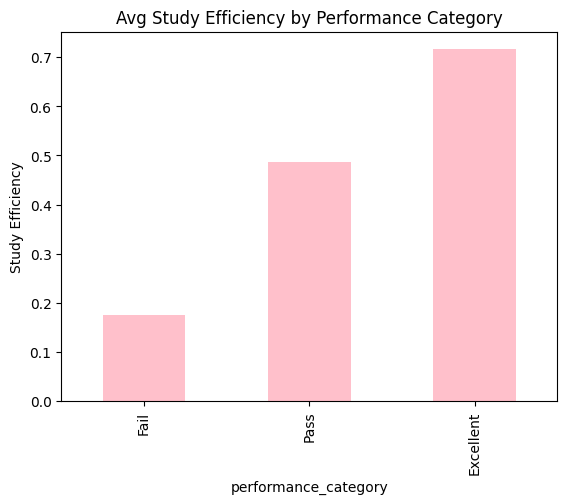

In [48]:

df.groupby('performance_category')['study_efficiency'].mean().plot(kind='bar', color='pink')
plt.title("Avg Study Efficiency by Performance Category")
plt.ylabel("Study Efficiency")
plt.show()


### Insight:
The "Avg Study Efficiency by Performance Category" chart clearly showed that students in the 'Excellent' performance category had the highest average study efficiency, followed by 'Pass', and then 'Fail'. This indicates a strong positive correlation between a student's study efficiency (as defined by study hours divided by sleep hours) and their exam performance.

There is a clear relationship: as study efficiency increases, exam scores also tend to increase.

### b. Average Exam Score by Sleep Category

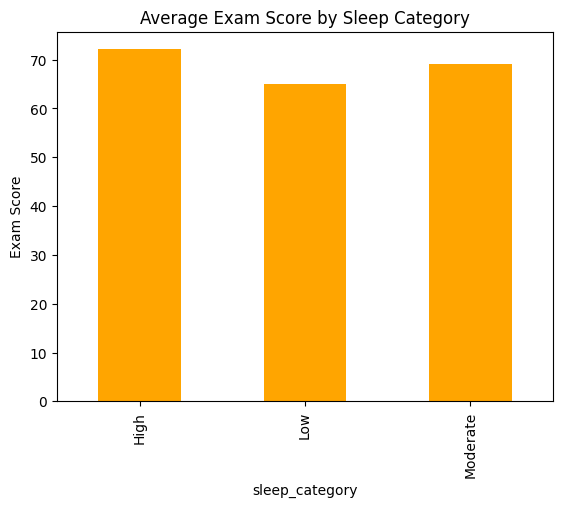

In [49]:
df.groupby('sleep_category')['exam_score'].mean().plot(kind='bar', color='orange')
plt.title('Average Exam Score by Sleep Category')
plt.ylabel('Exam Score')
plt.show()


### Insight:
The chart shows that people who get a "High" amount of sleep tend to have the best exam scores, followed closely by those with "Moderate" sleep. People who get "Low" amounts of sleep generally have lower exam scores compared to the other two groups.

### c. Exam Score by Diet Quality

/tmp/ipython-input-50-429315011.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('diet_quality')['exam_score'].mean().plot(kind='bar', color='yellow')


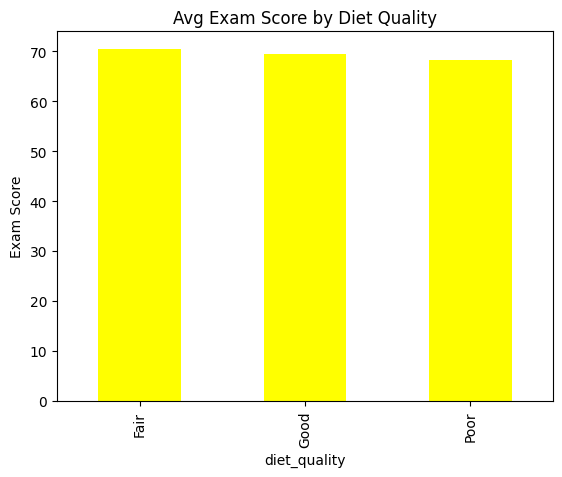

In [50]:
df.groupby('diet_quality')['exam_score'].mean().plot(kind='bar', color='yellow')
plt.title('Avg Exam Score by Diet Quality')
plt.ylabel('Exam Score')
plt.show()



### Insight:
The students having fair diet gets maximum scores showing that nutritious diet very important role in securing good marks in exams.

### d.Study Efficiency Across Performance Category

/tmp/ipython-input-51-1845470846.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('performance_category')['study_efficiency'].mean().plot(kind='bar', color='purple')


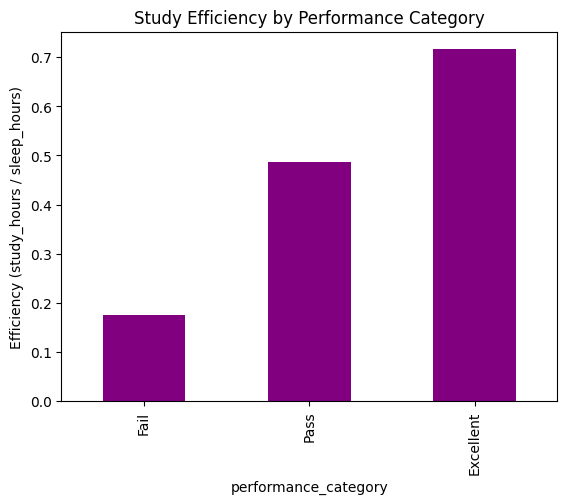

In [51]:
df.groupby('performance_category')['study_efficiency'].mean().plot(kind='bar', color='purple')
plt.title('Study Efficiency by Performance Category')
plt.ylabel('Efficiency (study_hours / sleep_hours)')
plt.show()


### Insight:
Students in the Excellent category showed the highest study efficiency.
It means that students who scored more than 75 (Excellent category) used their study time more effectively compared to others — they likely balanced study hours and sleep better, resulting in higher performance.

### End Summary of Group Analysis:
 Group-wise analysis revealed that study habits, sleep patterns, and diet quality significantly affect student performance.
These insights can guide students, parents, and educators to improve learning outcomes through lifestyle changes.

### Step 9: Hypothesis Testing:
to check if observed differences or patterns in data (e.g., between groups) are real and statistically significant, not just due to random chance.

### 1. Choose 2 Key Questions related to Group Analysis

Do male and female students have different exam scores? (T-test)

Does diet quality affect exam scores? (ANOVA – 3 groups: Poor, Average, Good)

**Why these two are taken?**

We choose these two tests because they are directly linked to important factors that might influence student performance

Some features (like study_hours or sleep_hours) are numerical, and their relationship with exam_score is already clear from correlation or scatter plots.

Hypothesis testing is mainly useful for categorical groups (e.g., Gender, Diet Quality) to check mean differences.

Using too many tests can clutter this project.

### T-Test (Two Groups):  Gender vs Exam Score

In [52]:
from scipy.stats import ttest_ind

# Split data by gender
male_scores = df[df['gender'] == 'Male']['exam_score']
female_scores = df[df['gender'] == 'Female']['exam_score']

# T-test
t_stat, p_value = ttest_ind(male_scores, female_scores)

print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Result: There is a significant difference between male and female exam scores.")
else:
    print("❌ Result: No significant difference found between male and female exam scores.")


T-statistic: -0.34, P-value: 0.7346
❌ Result: No significant difference found between male and female exam scores.


### Insight:
Although the boxplot suggests females have slightly higher median exam scores compared to males, the T-test (p=0.73) confirms that this difference is not statistically significant.

A boxplot shows medians and spread (IQR), not statistical significance.

The T-test compares mean scores, not medians.

### ANOVA (3+ Groups): Diet Quality

In [56]:
df_diet = df[['diet_quality', 'exam_score']].dropna()


In [58]:
from scipy.stats import f_oneway
## Group data
poor_diet = df_diet[df_diet['diet_quality'] == 'Poor']['exam_score']
fair_diet = df_diet[df_diet['diet_quality'] == 'Fair']['exam_score']
good_diet = df_diet[df_diet['diet_quality'] == 'Good']['exam_score']
#ANOVA
f_stat, p_value = f_oneway(poor_diet, fair_diet, good_diet)
print(f"F-statistic: {f_stat:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("✅ Result: Exam scores differ significantly across diet quality levels.")
else:
    print("❌ Result: No significant difference in exam scores across diet quality levels.")


F-statistic: 1.27, P-value: 0.2824
❌ Result: No significant difference in exam scores across diet quality levels.


### Insight:
Although students with better diet quality show slightly higher average scores in visual analysis, the ANOVA test (p = 0.28) confirms that these differences are not statistically significant — diet quality alone does not strongly impact exam performance.












### Final Conclusion
The Student Performance Analysis reveals that academic performance is influenced more by study habits and lifestyle balance rather than demographic factors like gender or diet quality. The distribution of exam scores is nearly symmetrical, with most students scoring between 60 and 80, indicating a balanced performance range.

Key findings include:

Study habits are crucial: Study hours and study efficiency (study hours vs. sleep hours) show the strongest positive correlation with exam scores. Students in the "Excellent" category (scores >75) effectively balanced study time and rest.

Sleep quality matters: Students who maintained 6–8 hours of sleep performed consistently better, while both too little (<5 hrs) and excessive (>9 hrs) sleep were linked to less consistent results.

Digital distractions hurt performance: More time spent on social media and Netflix correlates negatively with exam scores.

Demographic factors have limited impact: Gender and part-time jobs do not show a statistically significant effect on exam performance (validated by T-tests).

Lifestyle factors like diet and internet quality also do not show strong statistical significance in exam performance, as confirmed by ANOVA.

Overall, dedicated study time, efficient time management, and healthy sleep patterns are the most critical factors driving academic success in this dataset.